In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.dummy import DummyClassifier

##Antivirals Non-antivirals

In [ ]:
antivirals = pd.read_csv("/content/drive/MyDrive/DeepLearn4DrugDesign/Data/antivirals_descriptors.csv")

In [ ]:
non_antivirals = pd.read_csv("/content/drive/MyDrive/DeepLearn4DrugDesign/Data/non-antivirals_descriptors.csv")

In [ ]:
antivirals

In [ ]:
non_antivirals

In [ ]:
frames = []
frames = (antivirals, non_antivirals)
dataset = pd.concat(frames)

In [ ]:
dataset

In [ ]:
X = dataset.iloc[:,:-1].astype(float)
Y = dataset.iloc[:,-1]

##Feature ranking using RFE

In [ ]:
#Check with the Dummy Classifier
#model = DummyClassifier(strategy='uniform')

#Check the feature distribution in the dataset 
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

#Check the feature importance:
from sklearn.feature_selection import RFE
#rfe = RFE(model, 3)

rfe = RFE(estimator=DecisionTreeClassifier())
fit = rfe.fit(X, Y)
model = DecisionTreeClassifier()
#pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# fit the model on all available data
#pipeline.fit(X, Y)
print("Number of Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_)

Number of Features:  27
Selected Features:  [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True]
Feature Ranking:  [29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6
  5  4  3  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1]


In [ ]:
X.columns

Index(['SlogP_VSA2', 'EState_VSA8', 'SlogP_VSA6', 'SlogP_VSA3', 'PEOE_VSA4',
       'EState_VSA5', 'VSA_EState3', 'SMR_VSA6', 'BertzCT', 'SlogP_VSA8',
       'EState_VSA1', 'VSA_EState1', 'VSA_EState8', 'PEOE_VSA8', 'SlogP_VSA11',
       'PEOE_VSA1', 'VSA_EState7', 'VSA_EState6', 'EState_VSA3',
       'EState_VSA10', 'SMR_VSA8', 'PEOE_VSA13', 'PEOE_VSA6', 'EState_VSA9',
       'SlogP_VSA5', 'SlogP_VSA9', 'PEOE_VSA5', 'EState_VSA7', 'PEOE_VSA11',
       'SlogP_VSA7', 'PEOE_VSA2', 'SMR_VSA1', 'PEOE_VSA3', 'SlogP_VSA1',
       'SMR_VSA9', 'VSA_EState2', 'EState_VSA2', 'TPSA', 'SlogP_VSA10',
       'PEOE_VSA10', 'SlogP_VSA4', 'SMR_VSA7', 'VSA_EState9', 'EState_VSA6',
       'SMR_VSA4', 'LabuteASA', 'VSA_EState5', 'SMR_VSA2', 'PEOE_VSA12',
       'SMR_VSA5', 'PEOE_VSA7', 'SMR_VSA3', 'VSA_EState4', 'PEOE_VSA9',
       'EState_VSA4'],
      dtype='object')

In [88]:
N = 27
# Select last 27 columns of dataframe
X_selected = X.iloc[: , -N:]
dataset_selected = dataset.iloc[:,-N:]

In [ ]:
X_selected

,PEOE_VSA11,SlogP_VSA7,PEOE_VSA2,SMR_VSA1,PEOE_VSA3,SlogP_VSA1,SMR_VSA9,VSA_EState2,EState_VSA2,TPSA,SlogP_VSA10,PEOE_VSA10,SlogP_VSA4,SMR_VSA7,VSA_EState9,EState_VSA6,SMR_VSA4,LabuteASA,VSA_EState5,SMR_VSA2,PEOE_VSA12,SMR_VSA5,PEOE_VSA7,SMR_VSA3,VSA_EState4,PEOE_VSA9,EState_VSA4
0,0.0,5.022633,4.794537,24.134870,9.184952,15.065563,5.749512,27.188493,29.354467,92.00,10.077801,17.130184,11.735127,68.215848,1.480846,28.832568,5.917906,213.226948,-1.525861,0.000000,5.42879,39.151780,48.085553,4.5671,1.099041,30.297854,31.618542
1,0.0,5.022633,9.694447,33.666270,13.979489,15.065563,5.749512,38.358033,41.524801,118.30,14.872339,23.737066,11.735127,68.215848,1.421328,10.633467,5.917906,216.137073,-1.857941,0.000000,5.42879,26.310137,35.243910,4.5671,0.116985,36.842611,0.000000
2,0.0,5.022633,4.794537,28.871733,9.184952,15.065563,5.749512,27.131009,29.354467,101.23,10.077801,17.130184,11.735127,68.215848,1.470429,28.832568,5.917906,218.340493,-1.591823,0.000000,5.42879,26.310137,35.243910,4.5671,0.929348,43.511618,5.687386
3,0.0,5.022633,4.794537,24.134870,9.184952,15.065563,5.749512,27.276732,29.354467,92.00,10.077801,17.130184,11.735127,68.215848,1.484318,28.832568,5.917906,219.591890,-1.521480,0.000000,5.42879,45.572602,54.506375,4.5671,1.114467,30.297854,38.039364
4,0.0,5.022633,9.589074,28.929407,9.184952,15.065563,5.749512,39.134809,40.825098,109.07,10.077801,17.130184,11.735127,68.215848,1.441329,21.599744,5.917906,223.753412,-1.822958,0.000000,11.33597,45.572602,48.085553,4.5671,0.391164,30.297854,12.841643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,6.069221,0.000000,11.332897,0.00,0.000000,0.000000,23.671624,0.000000,0.000000,0.000000,23.671624,58.652957,3.851852,0.000000,777.00000,34.115770,777.000000,0.0000,0.000000,0.000000,23.671624
99995,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,6.069221,0.000000,5.917906,23.79,0.000000,0.000000,17.249019,35.895287,0.000000,0.000000,5.917906,72.642862,0.236019,5.261892,777.00000,18.759549,777.000000,0.0000,1.451181,11.987127,6.420822
99996,0.0,0.000000,0.000000,4.736863,0.000000,10.053652,5.749512,0.000000,0.000000,23.79,0.000000,0.000000,17.249019,35.895287,0.000000,0.000000,5.917906,66.277920,0.818148,5.261892,777.00000,12.338728,777.000000,0.0000,1.318565,11.987127,6.420822
99997,0.0,0.000000,0.000000,5.106527,0.000000,0.000000,0.000000,0.000000,5.414990,21.26,5.687386,5.749512,0.000000,23.762553,1.691149,7.109798,0.000000,66.183806,0.928843,0.000000,777.00000,6.420822,777.000000,0.0000,2.620509,7.109798,18.715090


In [ ]:
X_selected.columns

Index(['PEOE_VSA11', 'SlogP_VSA7', 'PEOE_VSA2', 'SMR_VSA1', 'PEOE_VSA3',
       'SlogP_VSA1', 'SMR_VSA9', 'VSA_EState2', 'EState_VSA2', 'TPSA',
       'SlogP_VSA10', 'PEOE_VSA10', 'SlogP_VSA4', 'SMR_VSA7', 'VSA_EState9',
       'EState_VSA6', 'SMR_VSA4', 'LabuteASA', 'VSA_EState5', 'SMR_VSA2',
       'PEOE_VSA12', 'SMR_VSA5', 'PEOE_VSA7', 'SMR_VSA3', 'VSA_EState4',
       'PEOE_VSA9', 'EState_VSA4'],
      dtype='object')

##KDE plots for the selected 27 features on composite dataset

In [85]:
X_selected.describe()

,PEOE_VSA11,SlogP_VSA7,PEOE_VSA2,SMR_VSA1,PEOE_VSA3,SlogP_VSA1,SMR_VSA9,VSA_EState2,EState_VSA2,TPSA,SlogP_VSA10,PEOE_VSA10,SlogP_VSA4,SMR_VSA7,VSA_EState9,EState_VSA6,SMR_VSA4,LabuteASA,VSA_EState5,SMR_VSA2,PEOE_VSA12,SMR_VSA5,PEOE_VSA7,SMR_VSA3,VSA_EState4,PEOE_VSA9,EState_VSA4
count,148874.000000,148874.000000,148874.000000,148874.000000,148874.000000,148874.000000,148874.000000,148874.000000,148874.000000,148874.000000,148874.000000,148874.000000,148874.000000,148874.000000,148874.000000,148874.000000,148874.000000,148874.000000,148874.000000,148874.000000,148874.000000,148874.000000,148874.000000,148874.000000,148874.000000,148874.000000,148874.000000
mean,4.410946,1.448182,7.425296,17.207451,5.271566,7.714078,4.156249,19.542653,14.161087,82.154512,4.734809,8.681674,6.405502,39.307265,-0.464726,12.272105,4.094190,142.785306,-0.170566,0.229534,523.803602,35.263886,534.654342,8.309416,2.199108,12.789611,15.362602
std,9.213530,9.204678,9.956047,18.549133,8.951605,10.560706,9.785142,19.962027,16.838425,69.897379,9.437258,12.432205,11.160065,29.853500,6.721220,16.015600,10.305768,74.772447,6.659798,6.151786,362.193994,37.147821,347.070923,11.196622,6.904295,14.231717,16.955920
min,-666.000000,-666.000000,-666.000000,-666.000000,-666.000000,-666.000000,-666.000000,-666.000000,-666.000000,-666.000000,-666.000000,-666.000000,-666.000000,-666.000000,-666.000000,-666.000000,-666.000000,-666.000000,-666.000000,-666.000000,0.000000,-666.000000,0.000000,-666.000000,-666.000000,-666.000000,-666.000000
25%,0.000000,0.000000,0.000000,5.032314,0.000000,0.000000,0.000000,8.555556,5.559267,34.890000,0.000000,0.000000,0.000000,16.681124,0.000000,0.000000,0.000000,97.937492,-0.479233,0.000000,10.023291,11.440240,59.772905,0.000000,0.000000,4.923311,4.567100
50%,0.000000,0.000000,4.794537,14.210589,4.794537,5.428790,0.000000,14.565257,11.502365,66.400000,0.000000,5.760247,0.000000,35.484945,0.000000,6.923737,0.000000,128.314037,0.000000,0.000000,777.000000,24.925325,777.000000,5.316789,1.286163,11.250838,11.761885
75%,6.227901,0.000000,9.883888,23.730748,9.374394,11.249010,5.749512,26.014426,19.183069,111.907500,5.884182,12.331868,10.829981,59.408693,0.000000,19.192200,5.842670,167.139501,0.593302,0.000000,777.000000,49.079601,777.000000,14.450988,3.706413,18.628754,23.092831
max,141.543529,405.914704,208.363159,2090.036965,151.570822,447.624652,119.623386,440.266929,2085.461439,1843.000000,316.109883,349.730479,247.750780,434.338695,30.716667,323.173453,94.710805,2225.393440,25.400544,94.714048,777.000000,645.033951,777.000000,174.420680,74.333964,442.858989,305.411057


PEOE_VSA11


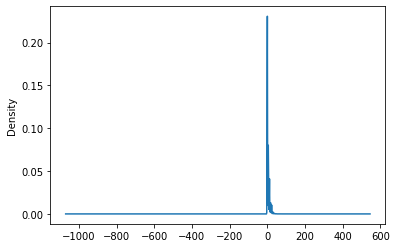

In [84]:
print("PEOE_VSA11")
X_selected['PEOE_VSA11'].plot.kde()

SlogP_VSA7


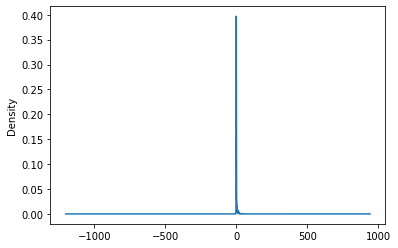

In [68]:
print("SlogP_VSA7")
X_selected['SlogP_VSA7'].plot.kde()

PEOE_VSA2


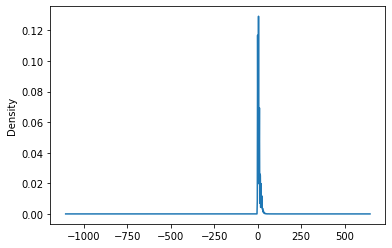

In [69]:
print("PEOE_VSA2")
X_selected['PEOE_VSA2'].plot.kde()

SMR_VSA1


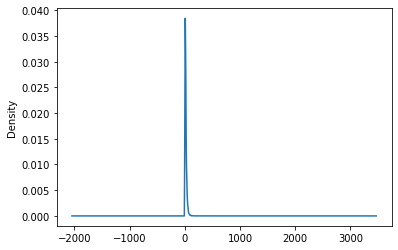

In [70]:
print("SMR_VSA1")
X_selected['SMR_VSA1'].plot.kde()

PEOE_VSA3


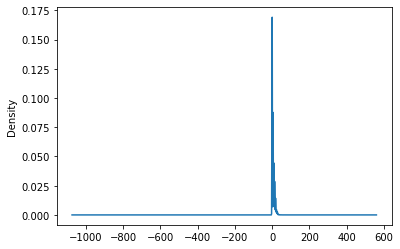

In [71]:
print("PEOE_VSA3")
X_selected['PEOE_VSA3'].plot.kde()

SlogP_VSA1


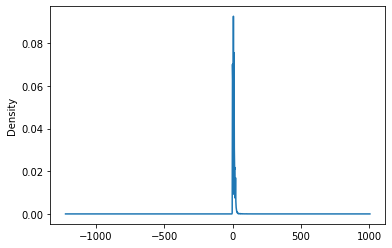

In [72]:
print("SlogP_VSA1")
X_selected['SlogP_VSA1'].plot.kde()

SMR_VSA9


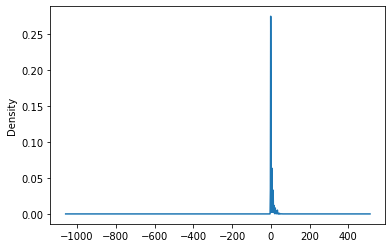

In [73]:
print("SMR_VSA9")
X_selected['SMR_VSA9'].plot.kde()

VSA_EState2


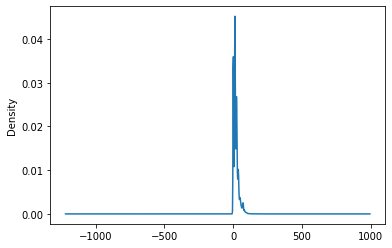

In [74]:
print("VSA_EState2")
X_selected['VSA_EState2'].plot.kde()

EState_VSA2


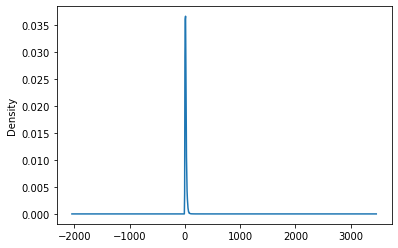

In [75]:
print("EState_VSA2")
X_selected['EState_VSA2'].plot.kde()

TPSA


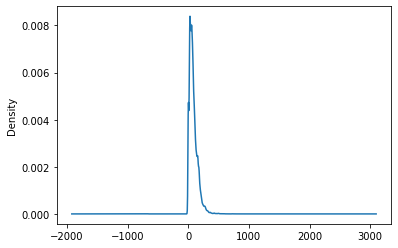

In [76]:
print("TPSA")
X_selected['TPSA'].plot.kde()

SlogP_VSA10


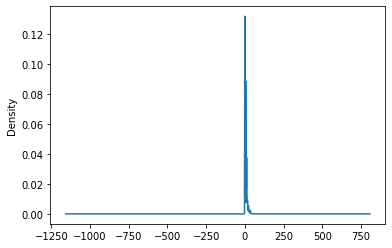

In [77]:
print("SlogP_VSA10")
X_selected['SlogP_VSA10'].plot.kde()

PEOE_VSA10


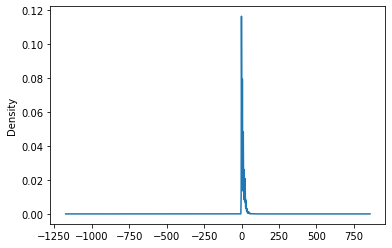

In [80]:
print("PEOE_VSA10")
X_selected['PEOE_VSA10'].plot.kde()

SlogP_VSA4


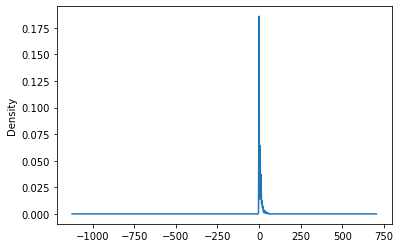

In [81]:
print("SlogP_VSA4")
X_selected['SlogP_VSA4'].plot.kde()

SMR_VSA7


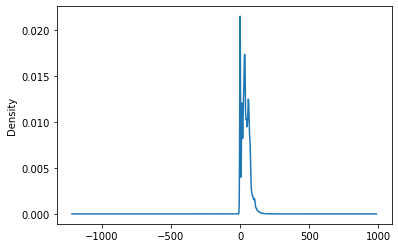

In [82]:
print("SMR_VSA7")
X_selected['SMR_VSA7'].plot.kde()

VSA_EState9


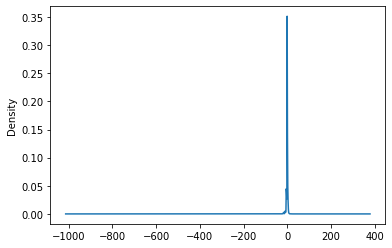

In [83]:
print("VSA_EState9")
X_selected['VSA_EState9'].plot.kde()

EState_VSA6


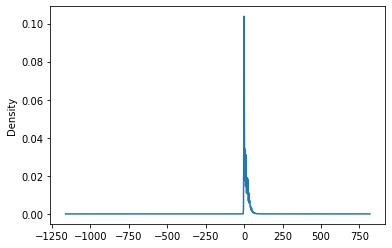

In [ ]:
print("EState_VSA6")
X_selected['EState_VSA6'].plot.kde()

SMR_VSA4


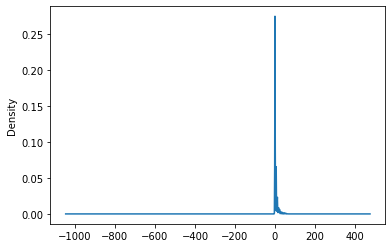

In [ ]:
print("SMR_VSA4")
X_selected['SMR_VSA4'].plot.kde()

LabuteASA


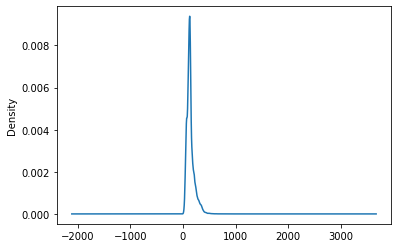

In [ ]:
print("LabuteASA")
X_selected['LabuteASA'].plot.kde()

VSA_EState5


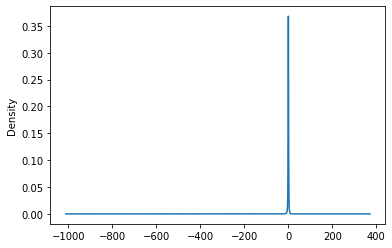

In [ ]:
print("VSA_EState5")
X_selected['VSA_EState5'].plot.kde()

SMR_VSA2


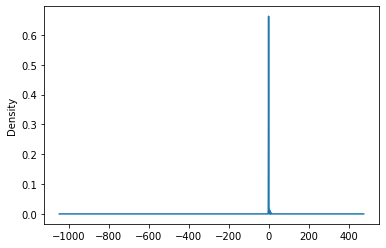

In [ ]:
print("SMR_VSA2")
X_selected['SMR_VSA2'].plot.kde()

PEOE_VSA12


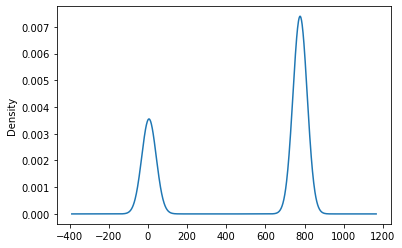

In [ ]:
print("PEOE_VSA12")
X_selected['PEOE_VSA12'].plot.kde(bw_method=0.1)

SMR_VSA5


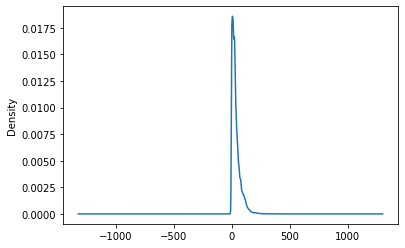

In [ ]:
print("SMR_VSA5")
X_selected['SMR_VSA5'].plot.kde()

PEOE_VSA7


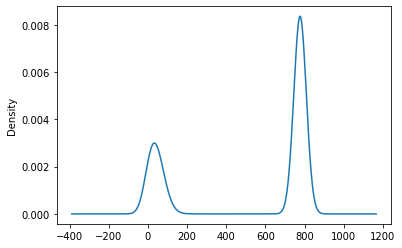

In [ ]:
print("PEOE_VSA7")
X_selected['PEOE_VSA7'].plot.kde()

SMR_VSA3


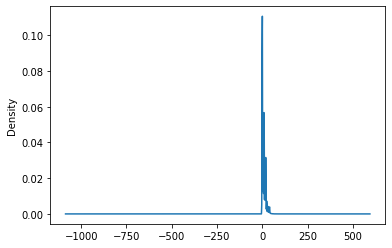

In [ ]:
print("SMR_VSA3")
X_selected['SMR_VSA3'].plot.kde()

VSA_EState4


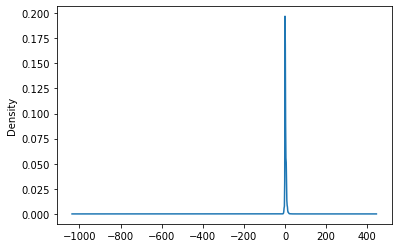

In [ ]:
print("VSA_EState4")
X_selected['VSA_EState4'].plot.kde()

PEOE_VSA9


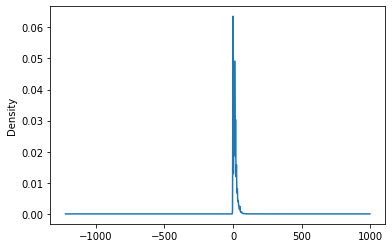

In [ ]:
print("PEOE_VSA9")
X_selected['PEOE_VSA9'].plot.kde()

EState_VSA4


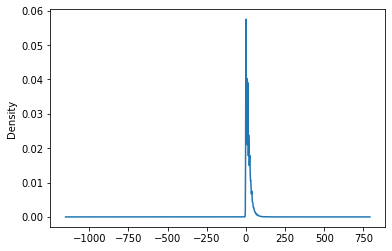

In [ ]:
print("EState_VSA4")
X_selected['EState_VSA4'].plot.kde()

##KDE plots for divided dataset

SlogP_VSA7


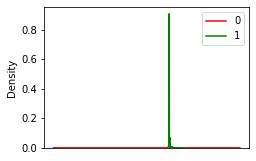

PEOE_VSA2


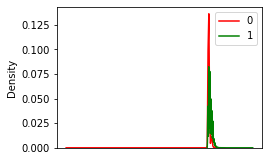

SMR_VSA1


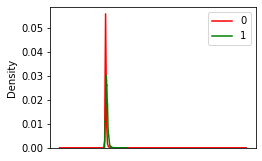

PEOE_VSA3


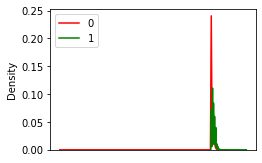

SlogP_VSA1


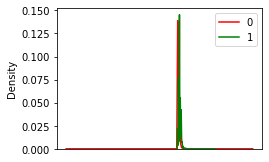

SMR_VSA9


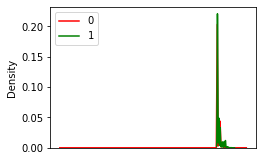

VSA_EState2


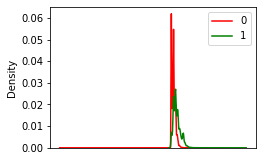

EState_VSA2


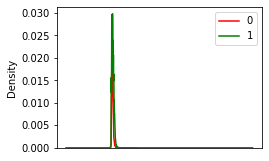

TPSA


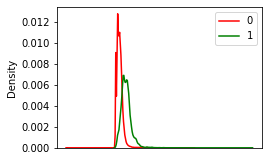

SlogP_VSA10


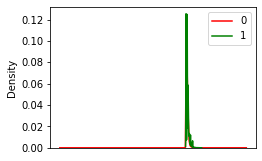

PEOE_VSA10


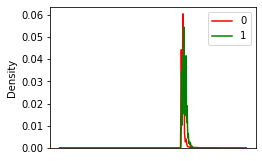

SlogP_VSA4


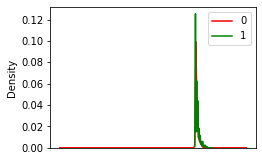

SMR_VSA7


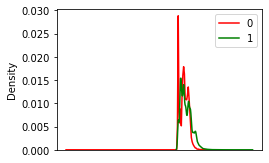

VSA_EState9


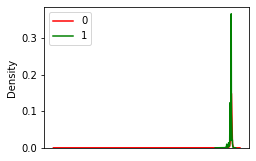

EState_VSA6


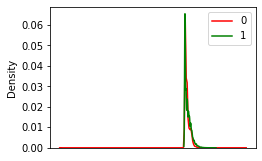

SMR_VSA4


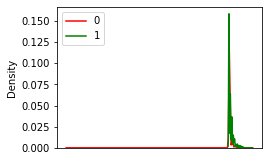

LabuteASA


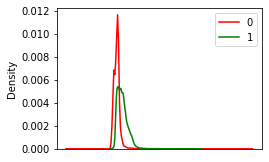

VSA_EState5


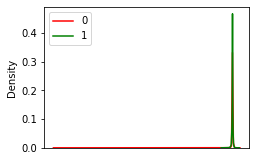

SMR_VSA2


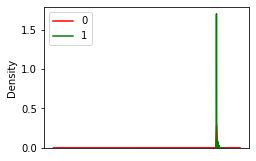

PEOE_VSA12


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


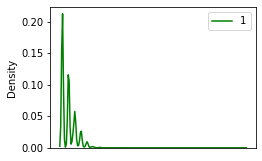

SMR_VSA5


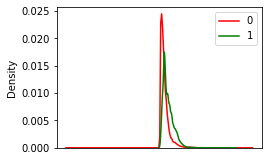

PEOE_VSA7


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


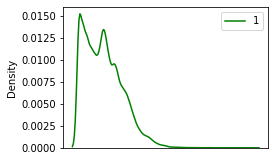

SMR_VSA3


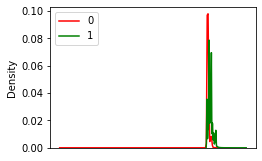

VSA_EState4


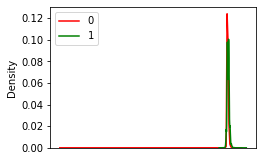

PEOE_VSA9


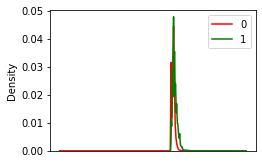

EState_VSA4


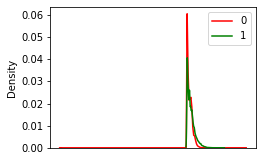

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.


Antiviral Property


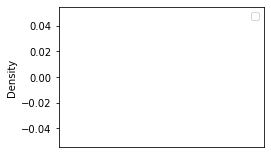

In [102]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
for feature in dataset_selected.columns:
    print(feature)
    #sns.boxplot(data=data,x=data.target,y=data[feature])
    gs1 = GridSpec(3,1)
    ax1 = plt.subplot(gs1[:-1])
    #ax2 = plt.subplot(gs1[-1])
    gs1.update(right=0.60)
    #sns.boxplot(x=feature,y='Antiviral Property',data=dataset_selected,ax=ax2)
    sns.kdeplot(dataset_selected[feature][dataset_selected['Antiviral Property']==0],ax=ax1,label='0', c='r')
    sns.kdeplot(dataset_selected[feature][dataset_selected['Antiviral Property']==1],ax=ax1,label='1',c='g')
    #ax2.yaxis.label.set_visible(False)
    ax1.xaxis.set_visible(False)
    plt.legend()
    plt.show()


In [ ]:
min_overlap = ['SlogP_VSA7',
'PEOE_VSA2',
'SMR_VSA1',
'PEOE_VSA3',
'VSA_EState2',
'EState_VSA2',
'TPSA',
'SlogP_VSA10',
'SMR_VSA7',
'VSA_EState9',
'LabuteASA',
'SMR_VSA2',
'SMR_VSA5',
]
for i in min_overlap:
  print(type(i))

In [108]:
selected_cols = X_selected.columns.values.tolist()

In [114]:
max_overlap=[]
for i in set(selected_cols)-set(min_overlap):
  max_overlap.append(i)

In [115]:
max_overlap

['SMR_VSA9',
 'PEOE_VSA10',
 'PEOE_VSA12',
 'PEOE_VSA9',
 'PEOE_VSA7',
 'SMR_VSA4',
 'EState_VSA4',
 'PEOE_VSA11',
 'EState_VSA6',
 'VSA_EState5',
 'SMR_VSA3',
 'SlogP_VSA4',
 'SlogP_VSA1',
 'VSA_EState4']

In [119]:
X_max_overlap = pd.DataFrame()

In [ ]:
X_min_overlap = pd.DataFrame()

In [121]:
for feature in max_overlap:
  X_max_overlap[feature] = X_selected[feature] 

In [ ]:
X_max_overlap

In [146]:
for feature_min in min_overlap:
  X_min_overlap[feature_min] = X_selected[feature_min] 

In [147]:
X_min_overlap

,SlogP_VSA7,PEOE_VSA2,SMR_VSA1,PEOE_VSA3,VSA_EState2,EState_VSA2,TPSA,SlogP_VSA10,SMR_VSA7,VSA_EState9,LabuteASA,SMR_VSA2,SMR_VSA5
0,5.022633,4.794537,24.134870,9.184952,27.188493,29.354467,92.00,10.077801,68.215848,1.480846,213.226948,0.000000,39.151780
1,5.022633,9.694447,33.666270,13.979489,38.358033,41.524801,118.30,14.872339,68.215848,1.421328,216.137073,0.000000,26.310137
2,5.022633,4.794537,28.871733,9.184952,27.131009,29.354467,101.23,10.077801,68.215848,1.470429,218.340493,0.000000,26.310137
3,5.022633,4.794537,24.134870,9.184952,27.276732,29.354467,92.00,10.077801,68.215848,1.484318,219.591890,0.000000,45.572602
4,5.022633,9.589074,28.929407,9.184952,39.134809,40.825098,109.07,10.077801,68.215848,1.441329,223.753412,0.000000,45.572602
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0.000000,0.000000,0.000000,0.000000,0.000000,11.332897,0.00,0.000000,0.000000,0.000000,58.652957,0.000000,34.115770
99995,0.000000,0.000000,0.000000,0.000000,0.000000,5.917906,23.79,0.000000,35.895287,0.000000,72.642862,5.261892,18.759549
99996,0.000000,0.000000,4.736863,0.000000,0.000000,0.000000,23.79,0.000000,35.895287,0.000000,66.277920,5.261892,12.338728
99997,0.000000,0.000000,5.106527,0.000000,0.000000,5.414990,21.26,5.687386,23.762553,1.691149,66.183806,0.000000,6.420822


In [160]:
X_max_overlap_13features = X_max_overlap.iloc[:, 0:X_max_overlap.shape[1]-1]

In [162]:
X_max_overlap_13features.shape

(148874, 13)

In [138]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_label = le.fit_transform(Y)

In [163]:
sss = StratifiedShuffleSplit(n_splits=1, test_size = 0.25)
for train_index, val_index in sss.split(X_max_overlap_13features, Y_label):
  train_X= X_max_overlap_13features.iloc[train_index,:]
  val_X = X_max_overlap_13features.iloc[val_index,:]
  train_Y = Y_label[train_index]
  val_Y = Y_label[val_index]

In [125]:
len(train_X)

111655

In [126]:
len(val_X)

37219

##Logistic Regression

In [164]:
logreg = LogisticRegression()

In [165]:
logreg.fit(train_X,train_Y)

LogisticRegression()

In [166]:
pred_Y=logreg.predict(val_X)

In [167]:
cnf_matrix = metrics.confusion_matrix(val_Y, pred_Y)
cnf_matrix

array([[25000,     0],
       [    0, 12219]])

In [168]:
print("Accuracy:",metrics.accuracy_score(val_Y, pred_Y))

Accuracy: 1.0


In [ ]:
X.describe

##Deep Learning

In [154]:
import pandas
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [155]:
model = Sequential()
model.add(Dense(28, input_dim=13, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [156]:
history = model.fit(train_X, train_Y, epochs = 5, verbose=2)

Epoch 1/5
3490/3490 - 8s - loss: 0.3288 - accuracy: 0.8702 - 8s/epoch - 2ms/step
Epoch 2/5
3490/3490 - 5s - loss: 0.1976 - accuracy: 0.9204 - 5s/epoch - 1ms/step
Epoch 3/5
3490/3490 - 5s - loss: 0.1766 - accuracy: 0.9300 - 5s/epoch - 1ms/step
Epoch 4/5
3490/3490 - 5s - loss: 0.1666 - accuracy: 0.9346 - 5s/epoch - 1ms/step
Epoch 5/5
3490/3490 - 5s - loss: 0.1598 - accuracy: 0.9372 - 5s/epoch - 1ms/step


In [ ]:
_, acc = model.evaluate(val_X, val_Y)

2327/2327 [==============================] - 4s 2ms/step - loss: 7.2591e-09 - accuracy: 1.0000


In [ ]:
history.history['val_accuracy']

[1.0, 1.0, 1.0, 1.0, 1.0]

In [ ]:
history.history['accuracy']

[1.0, 1.0, 1.0, 1.0, 1.0]